# Virtual Screening Case Study 1
## Bioinformatics approaches in adhesion GPCR research


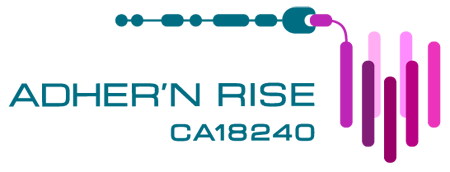

# Introduction
In this tutorial we will learn how to run the virtual screening using the open source software.
<br> Before beginning, be sure that all requirements are met (see README file) and jupyter notebook is run under the "oddt" kernel.

The Case Study is oriented towards emerging field of discovery of small molecule activators of aGPCRs.

We will learn how to exploit molecular docking in order to reduce the costs of <i> in vitro </i> screening campaigns, to find the lead structures and generate hypotheses for lead optimizations.


## Theoretical background for the case study

1. Structures of the glucocorticoid-bound adhesion receptor GPR97–Go complex <br> https://www.nature.com/articles/s41586-020-03083-w


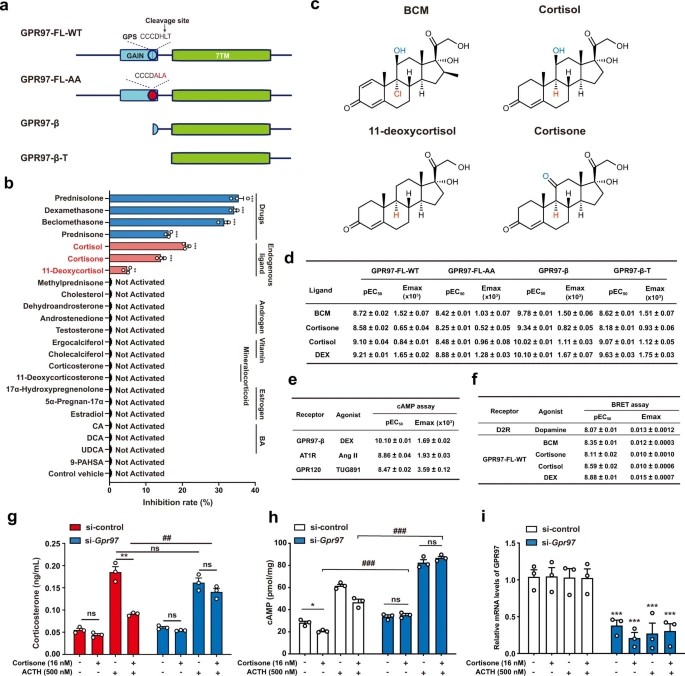

In [1]:
#Before we begin, make sure you have saved AMDock and gypsum at some easy-to-find locations (Win users).
#macOS users should download and extract Vina binary from https://vina.scripps.edu/downloads/

- # Step 1 - Protein preparation
Repeat all the steps from previous lesson. 
1. Made a choice between two complexes. PDB ID: 7D77 and 7D76
2. Remove all of the unnecessary chains and ligands (PyMOL)
3. Extract the ligand inside binding pocket as separate object (PyMOL)
4. Save and protonate apo protein (https://server.poissonboltzmann.org/pdb2pqr)
5. Download output pqr file, open in PyMOL and put the ligand back in the binding site. Save as pdb.


- # Step 2 - Ligands preparation
1. Prepare the ligands in SMILES format with tab-separated IDs
2. Run the gypsum script with desirable options summarized in sample_molecules.json file (manual https://durrantlab.pitt.edu/gypsum-dl/)
3. Inspect the output SDF file
4. Extract the cortisol/beclometasone
5. Explain alternatives

In [20]:
!python ../gypsum_dl-1.2.0/gypsum_dl-1.2.0/run_gypsum_dl.py -j ./sample_molecules.json


If you use Gypsum-DL in your research, please cite:

Ropp, Patrick J., Jacob O. Spiegel, Jennifer L. Walker, Harrison Green,
Guillermo A. Morales, Katherine A. Milliken, John J. Ringe, and Jacob D. Durrant.
(2019) Gypsum-DL: An Open-source Program for Preparing Small-molecule Libraries for 
Structure-based Virtual Screening. Journal of Cheminformatics 11:1. 
doi:10.1186/s13321-019-0358-3.

    Serial mode.
    Gypsum-DL-generated variants, we have identified a number of substructures
    that, though technically possible, strike us as improbable or otherwise
    poorly suited for virtual screening. We strongly recommend removing these by
    running Gypsum-DL with the --use_durrant_lab_filters option.

Loading molecules from steroids.smi...
Desalting all molecules (i.e., keeping only largest fragment).
    Contents of MolContainers
        MolContainer #0 (PREDNISOLONE)
            Mol #0: C[C@]12C[C@H](O)[C@H]3[C@@H](CCC4=CC(=O)C=C[C@@]43C)[C@@H]1C
                C[C@]2(O)C(=O)CO
  

            Mol #0:
                CC[C@@H]1CC[C@H]2[C@@H]3CC[C@H]4CCCC[C@]4(C)[C@H]3CC(=O)[C@@]21C
        MolContainer #18 (ESTRADIOL)
            Mol #0: C[C@]12CC[C@@H]3c4ccc([O-])cc4CC[C@H]3[C@@H]1CC[C@@H]2O
            Mol #1: C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C@@H]2O
        MolContainer #19 (UDCA)
            Mol #0: C[C@H](CCC(=O)[O-])[C@H]1CC[C@H]2[C@@H]3[C@@H](O)C[C@@H]4C[C
                @H](O)CC[C@]4(C)[C@H]3CC[C@@]21C
        MolContainer #20 (CA)
            Mol #0: C[C@H](CCC(=O)[O-])[C@H]1CC[C@H]2[C@H]3[C@H](C[C@H](O)[C@@]2
                1C)[C@@]1(C)CC[C@@H](O)C[C@H]1C[C@H]3O
        MolContainer #21 (DCA)
            Mol #0: C[C@H](CCC(=O)[O-])[C@H]1CC[C@H]2[C@@H]3CC[C@@H]4C[C@H](O)CC
                [C@]4(C)[C@H]3C[C@H](O)[C@@]21C
Enumerating all possible enantiomers for all molecules...
    Contents of MolContainers
        MolContainer #0 (PREDNISOLONE)
            Mol #0: C[C@]12C[C@H](O)[C@H]3[C@@H](CCC4=CC(=O)C=C[C@@]43C)[C@@H]1C
                C

- # Step 3 - Virtual Screening
1. Set up the docking in Vina using the AMDock (https://doi.org/10.1186/s13062-020-00267-2 may be downloaded from https://github.com/Valdes-Tresanco-MS/)
2. Import ODDT and dependent libraries (https://doi.org/10.1186/s13321-015-0078-2) in Jupyter notebook (package documentation https://oddt.readthedocs.io/en/latest/index.html)
3. Create the instance of autodock_vina class in ODDT. 
4. Adapt all of the paths to the input files. All input files for docking are automatically generated in AMDock Project directory so you can use that too (see 1.)
5. Run the virtual screening and write output SDF file


In [1]:
import oddt
from rdkit import Chem
from rdkit.Chem import AllChem
from oddt.docking import autodock_vina

In [22]:
#Initiate VS (ODDT documentation https://oddt.readthedocs.io/en/latest/index.html)
# Locate binary at AMDock-win-master/Lib/site-packages/AMDock/programs/vina
vina_path = '../AMDock-win-master/AMDock-win-master/Lib/site-packages/AMDock/programs/vina'
vs = autodock_vina(protein='./Input_files/agprs_cortisolH.pdb',
                   #center=(148.177,173.914,176.616),
                   auto_ligand='./Input_files/cocrystal.sdf',
                   executable=vina_path,
                   exhaustiveness=4,
                   n_cpu=4,
                   #size=(22, 22, 22),
                   num_modes=2,
                   prefix_dir = '.'
                  )

In [23]:
# Just to check the centering of the docking box
vs.center

array([ 92.333, 121.844, 116.43 ], dtype=float32)

In [26]:
#Perform actuall screening within the "for" loop and write output of EACH docking run (coordinates, scores, IDs etc.) in list object.
#10 mins
Dock_results = []
for mol in oddt.toolkit.readfile( 'sdf', './Final_results/gypsum_dl_test_output_steroids/gypsum_dl_success.sdf'):
        dock_res = vs.dock(mol)
        Dock_results.append(dock_res)

In [27]:
#Separate output molecules from same docking runs
All_Result = []

for poses in Dock_results:
     for pose in poses:
        All_Result.append(pose)

len (All_Result)
 # 449

46

In [28]:
#Write the output ussing Outputfile ODDT class (documentation https://oddt.readthedocs.io/en/latest/index.html)
DockAllResultOutput = oddt.toolkit.Outputfile( 'sdf' , 'ODDT_Dock_All_Result_notautomers.sdf' )
for mol in All_Result:
    DockAllResultOutput.write(mol)
DockAllResultOutput.close()

- # Step 4 - Analysis of Results
1. Compare the rank of known active molecules with literature data (see figure above)
2. Visualize in 2D and 3D. Perhaps cortisol and beclometasone solutions and compare with 7d77 and 7d76


In [2]:
# This is additional code for 3D visualization. It's just demonstration of utillity, USE PYMOL.
import py3Dmol
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
import MDAnalysis as mda
from MDAnalysis.coordinates import PDB
import openbabel
import prolif as plf
from prolif.plotting.network import LigNetwork

def visualize_3d(protein_loc, solitions_loc, id_of_solution, referent_ligsdf_loc):    
    view = py3Dmol.view()
    view.removeAllModels()
    view.setViewStyle({'style':'outline','color':'black','width':0.1})
    #Replace location of protein with yours
    view.addModel(open(protein_loc,'r').read(),format='pdbqt')
    Prot=view.getModel()
    Prot.setStyle({'cartoon':{'arrows':True, 'cartoon':True, 'lines':True, 'style':'oval', 'color':'white', 'opacity':1}})
    view.addSurface(py3Dmol.VDW,{'opacity':0.2,'color':'white'})
    #Here you add location of docking results and in [] define the number of solution to visualize
    results=Chem.SDMolSupplier(solitions_loc, sanitize=False)
    p=Chem.MolToMolBlock(results[id_of_solution],False)
    view.addModel(p)
    ref_m = view.getModel()
    ref_m.setStyle({},{'stick':{'colorscheme':'greenCarbon','radius':0.2}})
    # ADD referent molecule
    view.addModel(open(referent_ligsdf_loc,'r').read(),format='pdb')
    #ref_pdb = Chem.SDMolSupplier(referent_ligsdf_loc, sanitize=False)
    #p_ref = Chem.MolToMolBlock(ref_pdb[0],False)
    #view.addModel(p_ref)
    ref_mm = view.getModel()
    ref_mm.setStyle({},{'stick':{'colorscheme':'blackCarbon','radius':0.1}})


    view.zoomTo()
    view.show()

In [3]:
#Define locations of files for visualization (protein, sdf of docked ligands, number of solution you want to see, cocrystal ligand)
protein_loc = './Input_files/agprs_cortisolH.pdb'
solitions_loc = './Final_results/ODDT_Dock_All_Results.sdf'
id_of_solution = 5
referent_ligsdf_loc = './Input_files/cocrystal.sdf'
visualize_3d(protein_loc, solitions_loc, id_of_solution, referent_ligsdf_loc)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [4]:
#This is the set of functions which is intented for creation 2d protein-ligand representations
#This function correct formatting of RDKit (known issue of not writting explicit charges in sdf format, which prolif requires)
def add_formal_charges(m):
    m.UpdatePropertyCache(strict=False)
    for at in m.GetAtoms():
        if at.GetAtomicNum() == 7 and at.GetExplicitValence()==4 and at.GetFormalCharge()==0:
            at.SetFormalCharge(1)
    #add_formal_charges(m)
    return Chem.rdmolfiles.MolToMolFile(m, 'ligand.sdf')
#Secon function introduce corrections in mol2 format proposed in prolif documentation
def protein_for_fp(location):
    obConversion = openbabel.OBConversion()
    obConversion.SetInAndOutFormats("pdb", "mol2")
    mol = openbabel.OBMol()
    obConversion.ReadFile(mol, location)   # Open Babel will uncompress automatically
    obConversion.WriteFile(mol, 'protein_pdb.mol2')
    u = mda.Universe("protein_pdb.mol2")
    # add "elements" category
    elements = mda.topology.guessers.guess_types(u.atoms.names)
    u.add_TopologyAttr("elements", elements)
    # replace aromatic bonds with single bonds
    for i, bond_order in enumerate(u._topology.bonds.order):
        # you may need to replace double bonds ("2") as well
        if bond_order == "ar":
            u._topology.bonds.order[i] = 1
    # clear the bond cache, just in case
    u._topology.bonds._cache.pop("bd", None)
    # infer bond orders again
    return plf.Molecule.from_mda(u)
#this funct actually creates dataframe for visualization
def vis_2d(ligand, protein_location):
        prot = protein_for_fp(protein_location)
        ligand = add_formal_charges(ligand)
        lig_suppl_sdf = plf.sdf_supplier('ligand.sdf')
        fp = plf.Fingerprint()
        fp.run_from_iterable(lig_suppl_sdf, prot)
        df = fp.to_dataframe(return_atoms = True)
        return df, lig_suppl_sdf

In [5]:
#Vis2d function accepts as input ligand (results[number] and protein)
number_of_sol_in_sdf = 0
protein = './Input_files/agprs_cortisolH.pdb'
#solutions_loc = 'ODDT_Dock_All_Result_notautomers.sdf'
solitions_loc = './Input_files/cocrystal.sdf'
results=Chem.SDMolSupplier(solitions_loc, sanitize=False)

df, lig_suppl_sdf = vis_2d(results[number_of_sol_in_sdf],protein)
net = LigNetwork.from_ifp(df,lig_suppl_sdf[0],kind="frame",frame = 0, rotation=20)
net.display()

C:\Users\Korisnik\anaconda3\envs\oddt\lib\openbabel\__init__.py:14: UserWarning: "import openbabel" is deprecated, instead use "from openbabel import openbabel"
  warnings.warn('"import openbabel" is deprecated, instead use "from openbabel import openbabel"')


  0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
#Vis2d function accepts as input ligand (results[number] and protein)
#The case of prednisolone

number_of_sol_in_sdf = 0
protein = './Input_files/agprs_cortisolH.pdb'
solitions_loc = './Final_results/ODDT_Dock_All_Results.sdf'
#solutions_loc = 'cocrystal.sdf'
results=Chem.SDMolSupplier(solitions_loc, sanitize=False)

df, lig_suppl_sdf = vis_2d(results[number_of_sol_in_sdf],protein)
net = LigNetwork.from_ifp(df,lig_suppl_sdf[0],kind="frame",frame = 0, rotation=20)
net.display()

C:\Users\Korisnik\anaconda3\envs\oddt\lib\openbabel\__init__.py:14: UserWarning: "import openbabel" is deprecated, instead use "from openbabel import openbabel"
  warnings.warn('"import openbabel" is deprecated, instead use "from openbabel import openbabel"')


  0%|          | 0/1 [00:00<?, ?it/s]

# Homework
- MacOS and Linux users should check out the <b> Smina <b>:
<br> Brief instructions: 



- There are also some plugins for PyMOL which can be used instead of AMDock. Start here: https://github.com/ADplugin/ADplugin

- Try to implement this code to your own research.

## Further reading
- The most up-to-date review on usage of docking in GPCR reserach: https://pharmrev.aspetjournals.org/content/73/4/1698
- Different ways to validate the docking protocol. Start from here:  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2788795/
- Metrics to validate your SBVS through retrospective study. Start from here:  https://jcheminf.biomedcentral.com/articles/10.1186/s13321-016-0167-x
https://pubs.acs.org/doi/10.1021/jm300687e

